In [ ]:
import os
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
data = pd.read_csv("FertilizerPrediction.csv")
data.head()

,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous,FertilizerName
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


# Data Description

In [ ]:
data.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Temparature     99 non-null     int64 
 1   Humidity        99 non-null     int64 
 2   Moisture        99 non-null     int64 
 3   SoilType        99 non-null     object
 4   CropType        99 non-null     object
 5   Nitrogen        99 non-null     int64 
 6   Potassium       99 non-null     int64 
 7   Phosphorous     99 non-null     int64 
 8   FertilizerName  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [ ]:
data['SoilType'].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: SoilType, dtype: int64

In [ ]:
black_df = data[data['SoilType'] == 'Black']
sandy_df = data[data['SoilType'] == 'Sandy']
loamy_df = data[data['SoilType'] == 'Loamy']
Red_df = data[data['SoilType'] == 'Red']
clayey_df = data[data['SoilType'] == 'Clayey']

In [ ]:
black_df

,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous,FertilizerName
2,34,65,62,Black,Cotton,7,9,30,14-35-14
9,29,58,33,Black,Oil seeds,9,7,30,14-35-14
15,31,62,49,Black,Sugarcane,10,13,14,17-17-17
18,28,54,65,Black,Cotton,39,0,0,Urea
23,28,54,37,Black,Millets,36,0,0,Urea
28,37,70,32,Black,Oil seeds,12,0,39,DAP
35,28,54,35,Black,Millets,41,0,0,Urea
43,34,65,60,Black,Sugarcane,35,0,0,Urea
46,26,52,32,Black,Oil seeds,12,0,8,20-20
51,36,68,33,Black,Oil seeds,13,0,14,20-20


**Univariate Analysis**

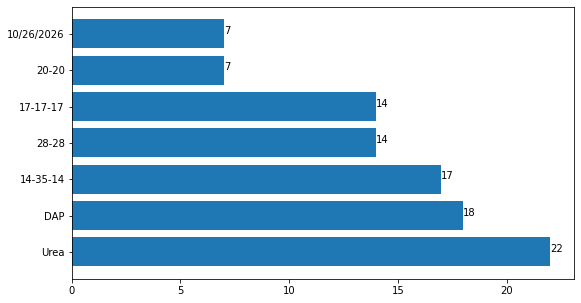

In [ ]:
labels = data["FertilizerName"].unique()
counts = list(data["FertilizerName"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

In [ ]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["SoilType", "CropType"]

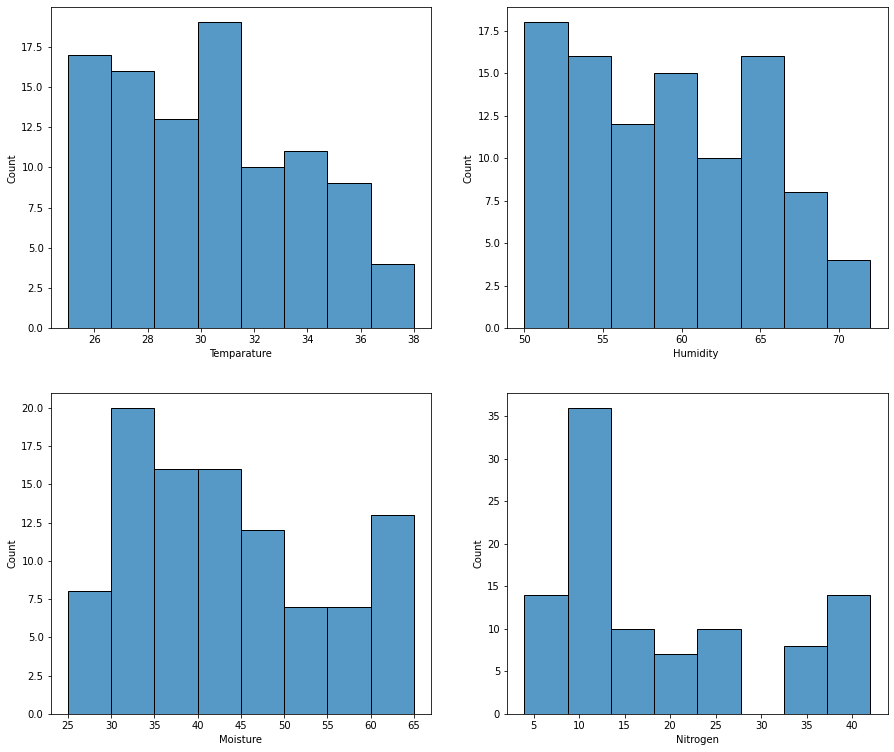

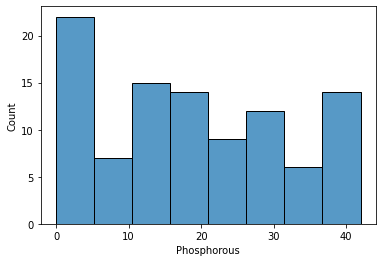

In [ ]:
plt.figure(figsize=(15,13))
i = 1
for column in continuous_data_cols[:-1]:
    plt.subplot(2,2,i)
    sns.histplot(data[column])
    i+=1
plt.show()

sns.histplot(data[continuous_data_cols[-1]])
plt.show()

From the above graph representation, we can observe that the data is not normalized. So here we are using the non parameteric test.

**Mannwhitney test**



In [ ]:
stats.mannwhitneyu(black_df['Nitrogen'],sandy_df['Nitrogen'])


MannwhitneyuResult(statistic=144.5, pvalue=0.10250453710912838)

Here in mannwhitney test the median of Nitrogen value in black soil and sandy soil are same, therefore Null Hypothesis.

As, p-value is 0.1 which is greater than 0.05. 

So, here we fail to reject null hypothesis.

In [ ]:
stats.mannwhitneyu(black_df['Nitrogen'],loamy_df['Nitrogen'])  


MannwhitneyuResult(statistic=173.0, pvalue=0.23974974859911607)

In [ ]:
stats.mannwhitneyu(black_df['Nitrogen'],Red_df['Nitrogen']) 

MannwhitneyuResult(statistic=175.5, pvalue=0.44763614993878637)

In [ ]:
stats.mannwhitneyu(black_df['Nitrogen'],clayey_df['Nitrogen']) 

MannwhitneyuResult(statistic=172.5, pvalue=0.3160581459529516)

In the above tests, we can observe that the median difference i.e. 175.5 between black and red soil levels are higher than compared to others, the t-score for this particular combination is high.

**Krushkal Wallis Test**

In [ ]:
stats.kruskal(black_df['Moisture'],sandy_df['Moisture'],loamy_df['Moisture'],Red_df['Moisture'],clayey_df['Moisture'])

KruskalResult(statistic=18.011145059821864, pvalue=0.0012279240015835742)





In the above scenario the assumption observed is, all soils will have same moisture and mean, therefore Null Hypothesis( Ho)

H1 is atleast one group median is different from the rest of the groups medians.

As per the above result p-value is 0.00122 which is less than 0.05, so we have rejected the Null Hypothesis.

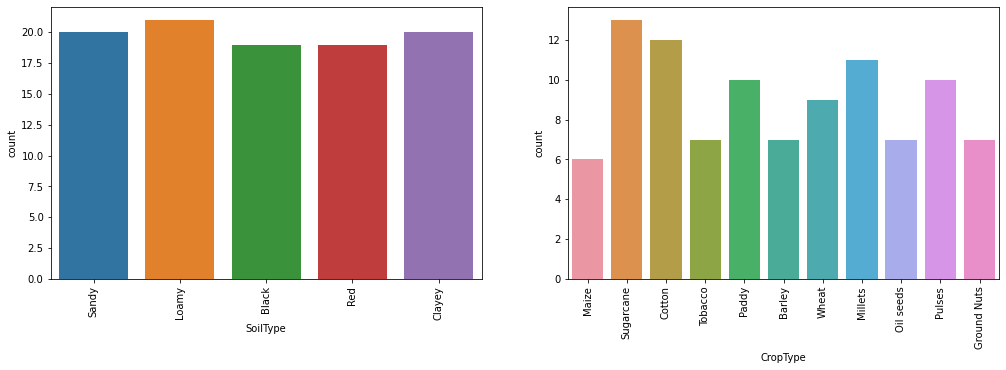

In [ ]:
plt.figure(figsize=(17,5))
i = 1
for column in categorical_data_cols:
    plt.subplot(1,2,i)
    sns.countplot(data[column])
    plt.xticks(rotation = 90)
    i+=1
plt.show()

**Bivariate analysis**

<Figure size 1512x1224 with 0 Axes>

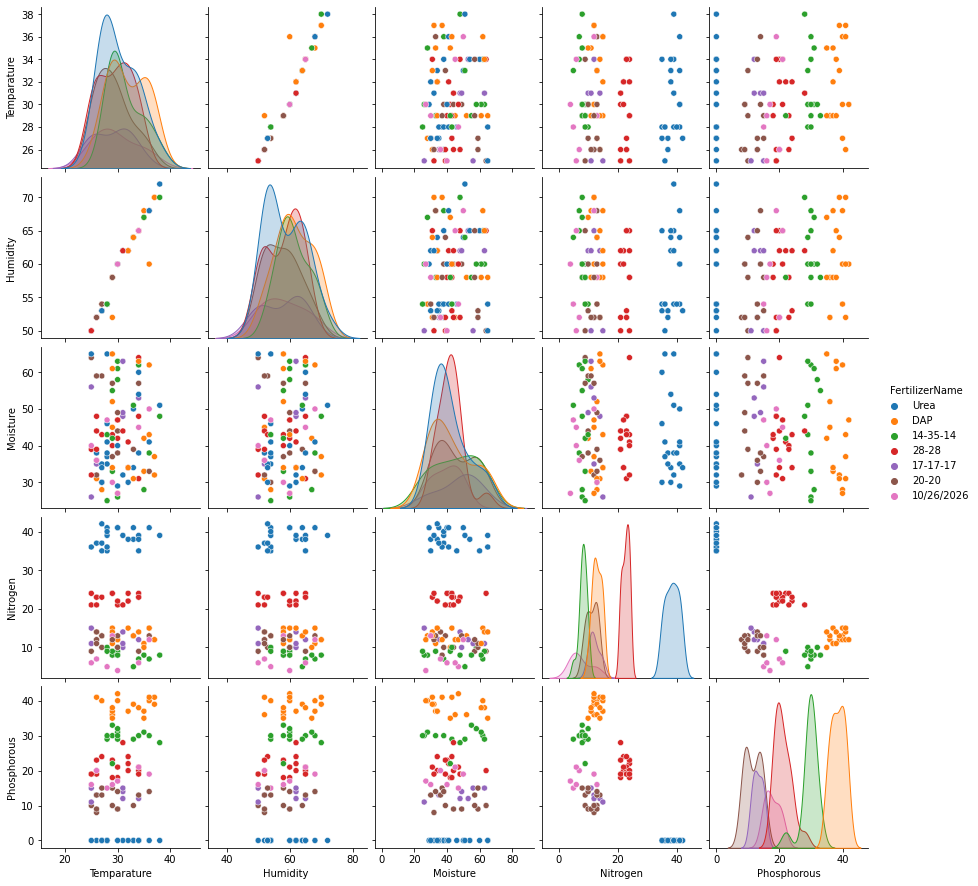

In [ ]:
plt.figure(figsize=(21,17))
sns.pairplot(data[continuous_data_cols + ["FertilizerName"]], hue = "FertilizerName")
plt.show()

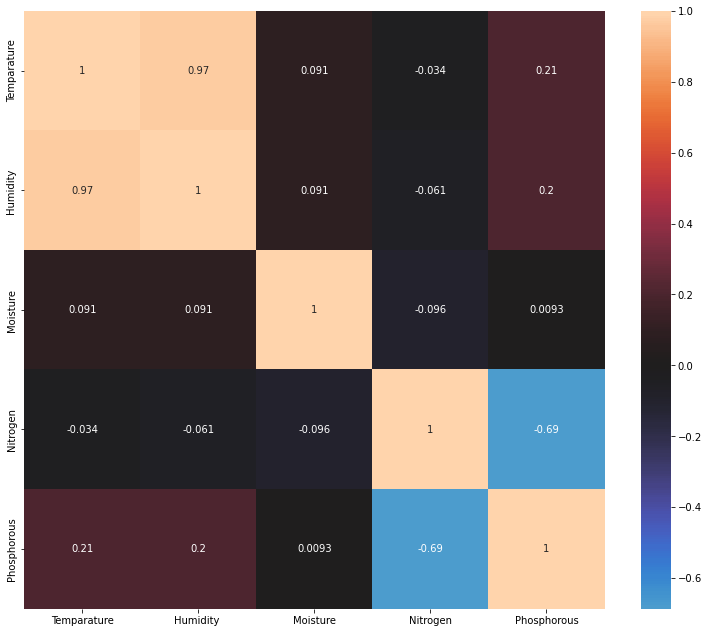

In [ ]:
plt.figure(figsize = (13,11))
sns.heatmap(data[continuous_data_cols].corr(), center = 0, annot = True)
plt.show()

In [ ]:
soil_type_label_encoder = LabelEncoder()
data["SoilType"] = soil_type_label_encoder.fit_transform(data["SoilType"])

In [ ]:
crop_type_label_encoder = LabelEncoder()
data["CropType"] = crop_type_label_encoder.fit_transform(data["CropType"])

In [ ]:
croptype_dict = {}
for i in range(len(data["CropType"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["SoilType"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [ ]:
fertname_label_encoder = LabelEncoder()
data["FertilizerName"] = fertname_label_encoder.fit_transform(data["FertilizerName"])

In [ ]:
fertname_dict = {}
for i in range(len(data["FertilizerName"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10/26/2026', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [ ]:
data.head()

,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous,FertilizerName
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [ ]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

**Upsampling the Data**

In [ ]:
counter = Counter(y)
counter

Counter({0: 7, 1: 14, 2: 7, 3: 14, 4: 17, 5: 18, 6: 22})

In [ ]:
from sklearn.utils import resample
spam_upsample = resample(data,
             replace=True,
             n_samples=800,
             random_state=42)

print(data.shape)

(99, 9)


In [ ]:
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


In [ ]:
print(f"Total Data after Upsampling: {len(X)}")

Total Data after Upsampling: 154


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.3, random_state = 0)


Above we have 70% training data and 30% testing data.

**KNN classifier**

In [ ]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions,average='macro')
    print(f"Accuracy at k = {i} is {accuracy}")
    print(f"F1-score at k = {i} is {f1}")
    print("---------------")
    error_rate.append(np.mean(predictions != y_test))




Accuracy at k = 1 is 0.8723404255319149
F1-score at k = 1 is 0.8774485232689567
---------------
Accuracy at k = 2 is 0.7872340425531915
F1-score at k = 2 is 0.7700845520394394
---------------
Accuracy at k = 3 is 0.8297872340425532
F1-score at k = 3 is 0.8262113617376776
---------------
Accuracy at k = 4 is 0.8297872340425532
F1-score at k = 4 is 0.8225490196078431
---------------
Accuracy at k = 5 is 0.8085106382978723
F1-score at k = 5 is 0.7972222222222223
---------------
Accuracy at k = 6 is 0.7446808510638298
F1-score at k = 6 is 0.7135567047331755
---------------
Accuracy at k = 7 is 0.7446808510638298
F1-score at k = 7 is 0.7343624629338915
---------------
Accuracy at k = 8 is 0.7659574468085106
F1-score at k = 8 is 0.7531008673865817
---------------
Accuracy at k = 9 is 0.7659574468085106
F1-score at k = 9 is 0.7521688837478312
---------------
Accuracy at k = 10 is 0.7446808510638298
F1-score at k = 10 is 0.7343266591386893
---------------
Accuracy at k = 11 is 0.70212765957446

In [ ]:
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Minimum error:- 0.1276595744680851 at K = 1


Text(0, 0.5, 'Error Rate')

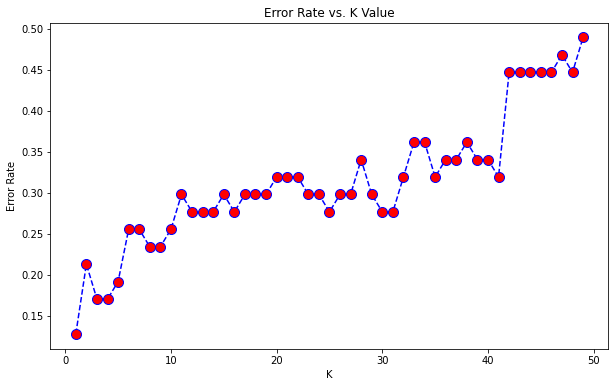

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##Logistic Regression with K-fold Cross-validation

In [ ]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))
print(f"Standard devation: {results_kfold.std()}")


Accuracy: 98.09%
Standard devation: 0.038235892445114716
